In [1]:
import HEAD_RECON
import multi_head
import copy
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.ndimage.morphology import binary_fill_holes
import sys
np.set_printoptions(threshold=sys.maxsize)

%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

1
(307200,)
dangling removal done
color filter done.


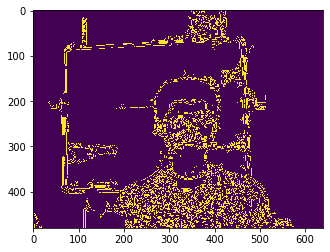

2
(307200,)
dangling removal done
color filter done.


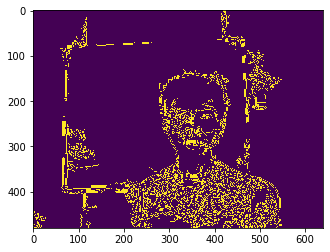

3
(307200,)
dangling removal done
color filter done.


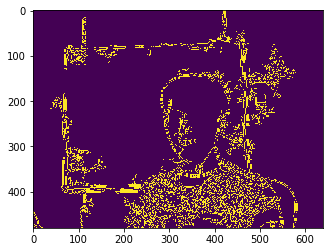

4
(307200,)
dangling removal done
color filter done.


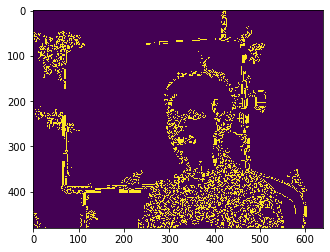

5
(307200,)
dangling removal done
color filter done.


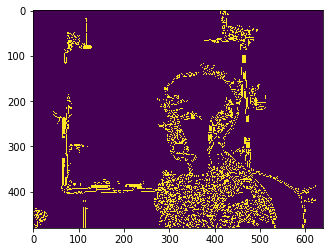

6
(307200,)
dangling removal done
color filter done.


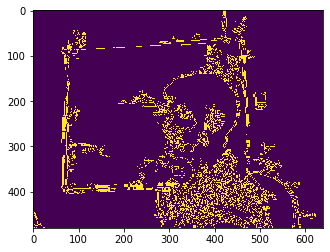

7
(307200,)
dangling removal done
color filter done.


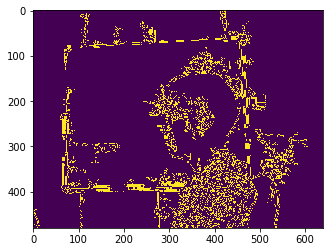

8
(307200,)
dangling removal done
color filter done.


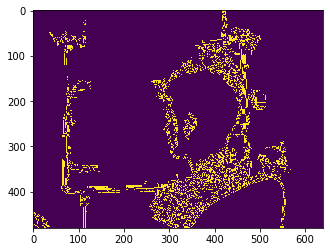

9
(307200,)
dangling removal done
color filter done.


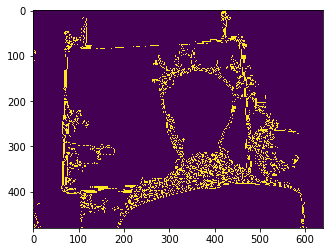

10
(307200,)
dangling removal done
color filter done.


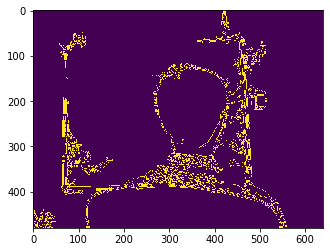

11
(307200,)
dangling removal done
color filter done.


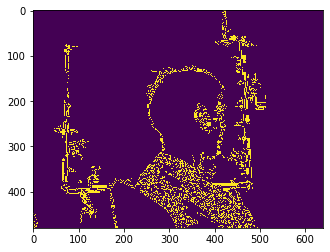

12
(307200,)
dangling removal done
color filter done.


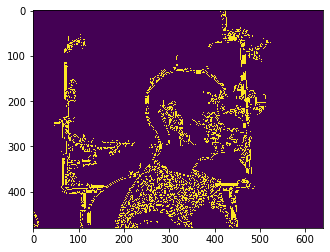

13
(307200,)
dangling removal done
color filter done.


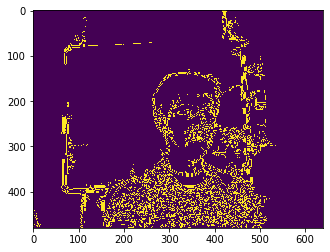

14
(307200,)
dangling removal done
color filter done.


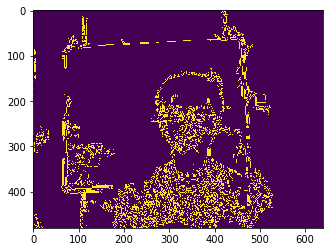

15
(307200,)
dangling removal done
color filter done.


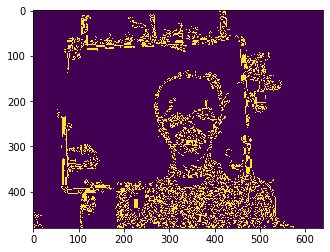

In [2]:
# gen 2d images
for i in range(1,16):
    print(i)
    head = HEAD_RECON.threeD_head.read_from_file(2,i)
    head.reset_filters()
    head.filter_nan()
#     head.filter_depth(1.5)
    head.sparsify(1)
#     head.remove_dangling()
    print("dangling removal done")
#     head.remove_background_color()
    print("color filter done.")
    head.edge_based_filter()
#     head.erode_filter(5)
#     head.filter_depth(1.5)
#     head.remove_dangling()
    head.center()
    head.get_filtered_image()
#     head.create_vpython_spheres()
#     head.save()

In [2]:
# gen pickled heads
for p in range(2,3):
    for i in range(1,16):
        print(i)
        head = HEAD_RECON.threeD_head.read_from_file(p,i)
        head.full_filter()
        head.get_filtered_image()

1
(307200,)
depth filter done.
dangling removal done
color filter done.
2
(307200,)
depth filter done.
dangling removal done
color filter done.
3
(307200,)
depth filter done.
dangling removal done
color filter done.
4
(307200,)
depth filter done.
dangling removal done
color filter done.
5
(307200,)
depth filter done.
dangling removal done
color filter done.
6
(307200,)
depth filter done.
dangling removal done
color filter done.
7
(307200,)
depth filter done.
dangling removal done
color filter done.
8
(307200,)
depth filter done.
dangling removal done
color filter done.
9
(307200,)
depth filter done.
dangling removal done
color filter done.
10
(307200,)
depth filter done.
dangling removal done
color filter done.
11
(307200,)
depth filter done.
dangling removal done
color filter done.
12
(307200,)
depth filter done.
dangling removal done
color filter done.
13
(307200,)
depth filter done.
dangling removal done
color filter done.
14
(307200,)
depth filter done.
dangling removal done
color 

In [3]:
# load heads
all_heads=[HEAD_RECON.threeD_head.load_from_pickle(4,i) for i in range (1,16)]

In [4]:
def make_mhead(all_heads, first, last):
    all_heads[first].paint([1,0,0])
    all_heads[first].reset_positions()
    all_heads[first].reset_colors()
    all_heads[first+1].reset_positions()
    all_heads[first+1].reset_colors()    
    
    heads = multi_head.MultiHead.joined_heads(all_heads[first], all_heads[first+1])
#     heads.icp_transform(0,1)
    for i in range(first+2,last+1):
        all_heads[i].reset_positions()
        all_heads[i].reset_colors()  
        print (i)
        heads.append_head(all_heads[i])
        heads.join_heads_wraper(i-1-first,i-first)
#         heads.icp_transform(i-1-first,i-first)
    heads.save(sparcity=1) 
    print ("completed")
    return heads

In [5]:
heads = make_mhead(all_heads,0,14)

463



2


363




0 min_error True params: [ 0.02 14.    0.5 ]
363



3


230




0 min_error True params: [ 0.02 14.    0.5 ]
230



4


160


/Users/caseliang/Repositories/AV_CW/SIFT.py:62: RuntimeWarning: divide by zero encountered in double_scalars
  err = np.sqrt(np.var(dist) / (np.sum(inliers) - min_num_inliers))




0 min_error True params: [ 0.02 14.    0.5 ]
160



5


201




0 min_error True params: [ 0.02 14.    0.5 ]
201



6


207




0 min_error True params: [ 0.02 14.    0.5 ]
207



7


161




0 min_error True params: [ 0.02 14.    0.5 ]
161



8


111




0 min_error True params: [ 0.02 14.    0.5 ]
111



9


135




0 min_error True params: [ 0.02 14.    0.5 ]
135



10


106




0 min_error True params: [ 0.02 14.    0.5 ]
106



11


166




0 min_error True params: [ 0.02 14.    0.5 ]
166



12


204




0 min_error True params: [ 0.02 14.    0.5 ]
204



13


167




0 min_error True params: [ 0.02 14.    0.5 ]
167



14


301




0 min_error True params: [ 0.02 14.    0.5 ]
301



Saving Completed
completed


In [5]:
heads.left_eye_deviation(0)

0 172576
coordinate of the left eye: [ 0.0345545  -0.17854231 -0.02274339] in frame 0
1 172581
coordinate of the left eye: [ 0.03640054 -0.17906708 -0.01864559] in frame 1
12 169336
coordinate of the left eye: [ 0.0423335  -0.15481534  0.03370858] in frame 12
13 170000
coordinate of the left eye: [ 0.03882328 -0.1541353   0.03081354] in frame 13
14 169380
coordinate of the left eye: [ 0.03710537 -0.15637763  0.03361353] in frame 14
[ 0.03784344 -0.16458753  0.01134933]
[[-0.00328894 -0.01395478 -0.03409273]
 [-0.0014429  -0.01447955 -0.02999493]
 [ 0.00449006  0.00977219  0.02235924]
 [ 0.00097984  0.01045223  0.01946421]
 [-0.00073807  0.0082099   0.0222642 ]]
mean coordinate: [ 0.03784344 -0.16458753  0.01134933]. Distance to each points: [0.03698468 0.03333819 0.02481113 0.02211481 0.02374114].


(array([ 0.03784344, -0.16458753,  0.01134933]),
 array([0.03698468, 0.03333819, 0.02481113, 0.02211481, 0.02374114]))

In [9]:
heads.left_eye_deviation(1)

0 153974
coordinate of the left eye: [ 0.01958677 -0.12910025 -0.00640524] in frame 0
1 150143
coordinate of the left eye: [ 0.02184315 -0.12885785 -0.00816567] in frame 1
2 150124
coordinate of the left eye: [ 0.01827939 -0.12761078 -0.01151653] in frame 2
13 147576
coordinate of the left eye: [-0.00435965 -0.13210005 -0.00961363] in frame 13
14 150775
coordinate of the left eye: [-0.00726736 -0.12949743 -0.01545459] in frame 14
[ 0.00961646 -0.12943327 -0.01023113]
[[ 9.97031059e-03  3.33022414e-04  3.82588835e-03]
 [ 1.22266925e-02  5.75420423e-04  2.06546226e-03]
 [ 8.66292738e-03  1.82249184e-03 -1.28539527e-03]
 [-1.39761117e-02 -2.66677491e-03  6.17499115e-04]
 [-1.68838187e-02 -6.41597689e-05 -5.22345446e-03]]
mean coordinate: [ 0.00961646 -0.12943327 -0.01023113]. Distance to each points: [0.01068435 0.01241327 0.00894539 0.01424165 0.01767348].


(array([ 0.00961646, -0.12943327, -0.01023113]),
 array([0.01068435, 0.01241327, 0.00894539, 0.01424165, 0.01767348]))

In [13]:
heads.left_eye_deviation(2)

0 152103
coordinate of the left eye: [ 0.0477391  -0.16602056  0.00701409] in frame 0
1 152745
coordinate of the left eye: [ 0.05224443 -0.16629774  0.0119082 ] in frame 1
12 150113
coordinate of the left eye: [ 0.08484852 -0.13831299  0.12609314] in frame 12
13 149516
coordinate of the left eye: [ 0.0773928  -0.14083417  0.13746829] in frame 13
14 151469
coordinate of the left eye: [ 0.07982782 -0.13955872  0.13644406] in frame 14
[ 0.06841054 -0.15020484  0.08378556]
[[-0.02067143 -0.01581572 -0.07677146]
 [-0.01616611 -0.01609291 -0.07187736]
 [ 0.01643798  0.01189185  0.04230758]
 [ 0.00898227  0.00937066  0.05368274]
 [ 0.01141729  0.01064612  0.0526585 ]]
mean coordinate: [ 0.06841054 -0.15020484  0.08378556]. Distance to each points: [0.08106357 0.07541007 0.04692073 0.05522976 0.05492369].


(array([ 0.06841054, -0.15020484,  0.08378556]),
 array([0.08106357, 0.07541007, 0.04692073, 0.05522976, 0.05492369]))

In [6]:
heads.left_eye_deviation(3)

0 116190


IndexError: index 116190 is out of bounds for axis 0 with size 70610

In [30]:
a=np.empty((0,3))

In [32]:
a=np.append(a,np.array([1,1,1]))

In [33]:
a=np.stack((a,np.array([1,1,1])))

In [35]:
a=[]

In [38]:
a.append([1])

In [39]:
a

[[1], [1]]